# ACCRE Project - Question 1

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

## To-Do List
1. Line Plot of Mean and Median
2. Box plot of hourly completions per month
3. Decide which graph is best for representing the median is more than the mean  (line graphs, stacked bar graphs, box plot, or combo)
4. More In Depth Look Into 3rd Week of September<br>
    a. Look at Memory Usage vs. Required Memory<br>
    b. States of Ended Jobs<br>
    c. Discuss about task utilization
    d. Decide on visualization that will best show this
    e. Look for other trends that could explain the high number of ended jobs in 3rd week of September

In [93]:
# Set fontsize
fontsize = 30

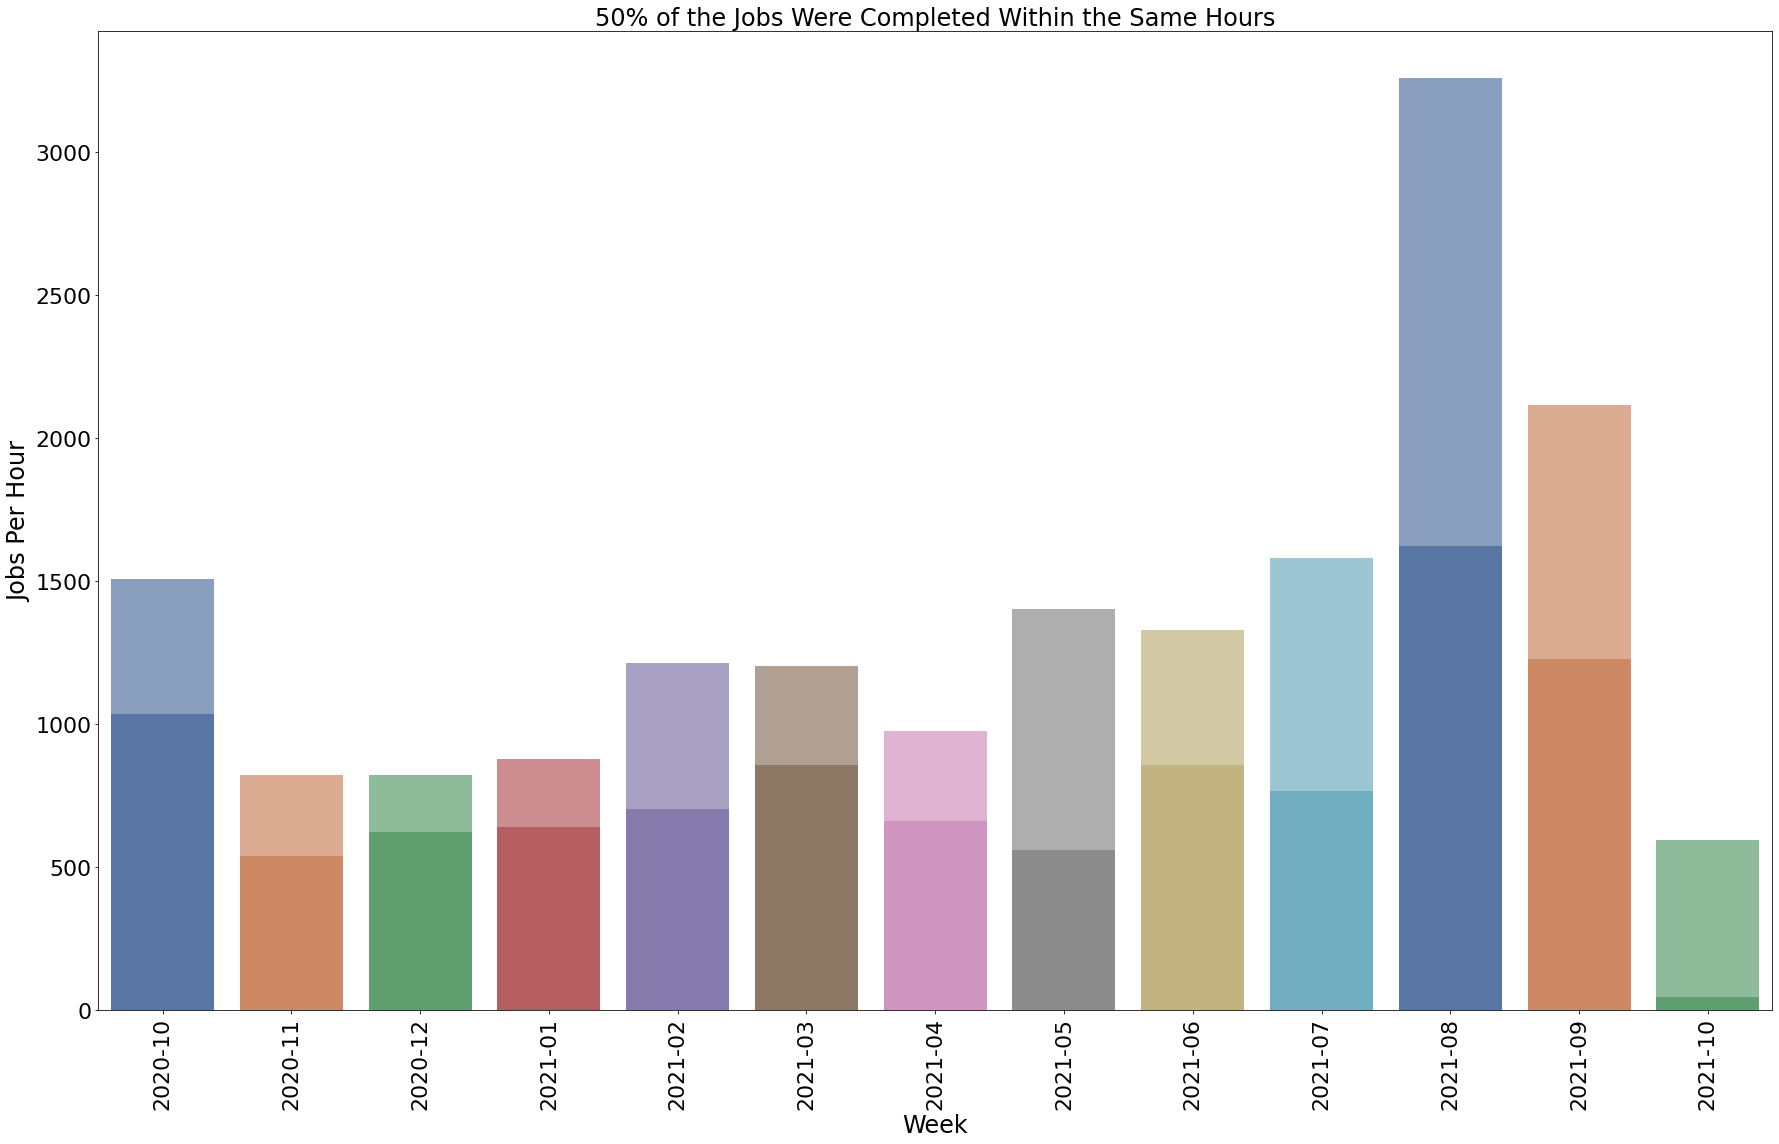

In [90]:
# Median jobs ended per hour each month
weekly_jobs_ended_by_hour_median = jobs.groupby(pd.Grouper(key='END',freq='M')).median()
weekly_jobs_ended_by_hour_median = weekly_jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each month
weekly_jobs_ended_by_hour_mean = jobs.groupby(pd.Grouper(key='END',freq='M')).count()/730
weekly_jobs_ended_by_hour_mean = weekly_jobs_ended_by_hour_mean.reset_index()

# Format date ticks for x axis
date_labels = weekly_jobs_ended_by_hour_median['END'].dt.strftime('%Y-%m')

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_by_hour_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour_mean, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
plt.xlabel('Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 90)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

plt.title("50% of the Jobs Were Completed Within the Same Hours", fontsize = fontsize)

ax.get_legend().set_visible(False);

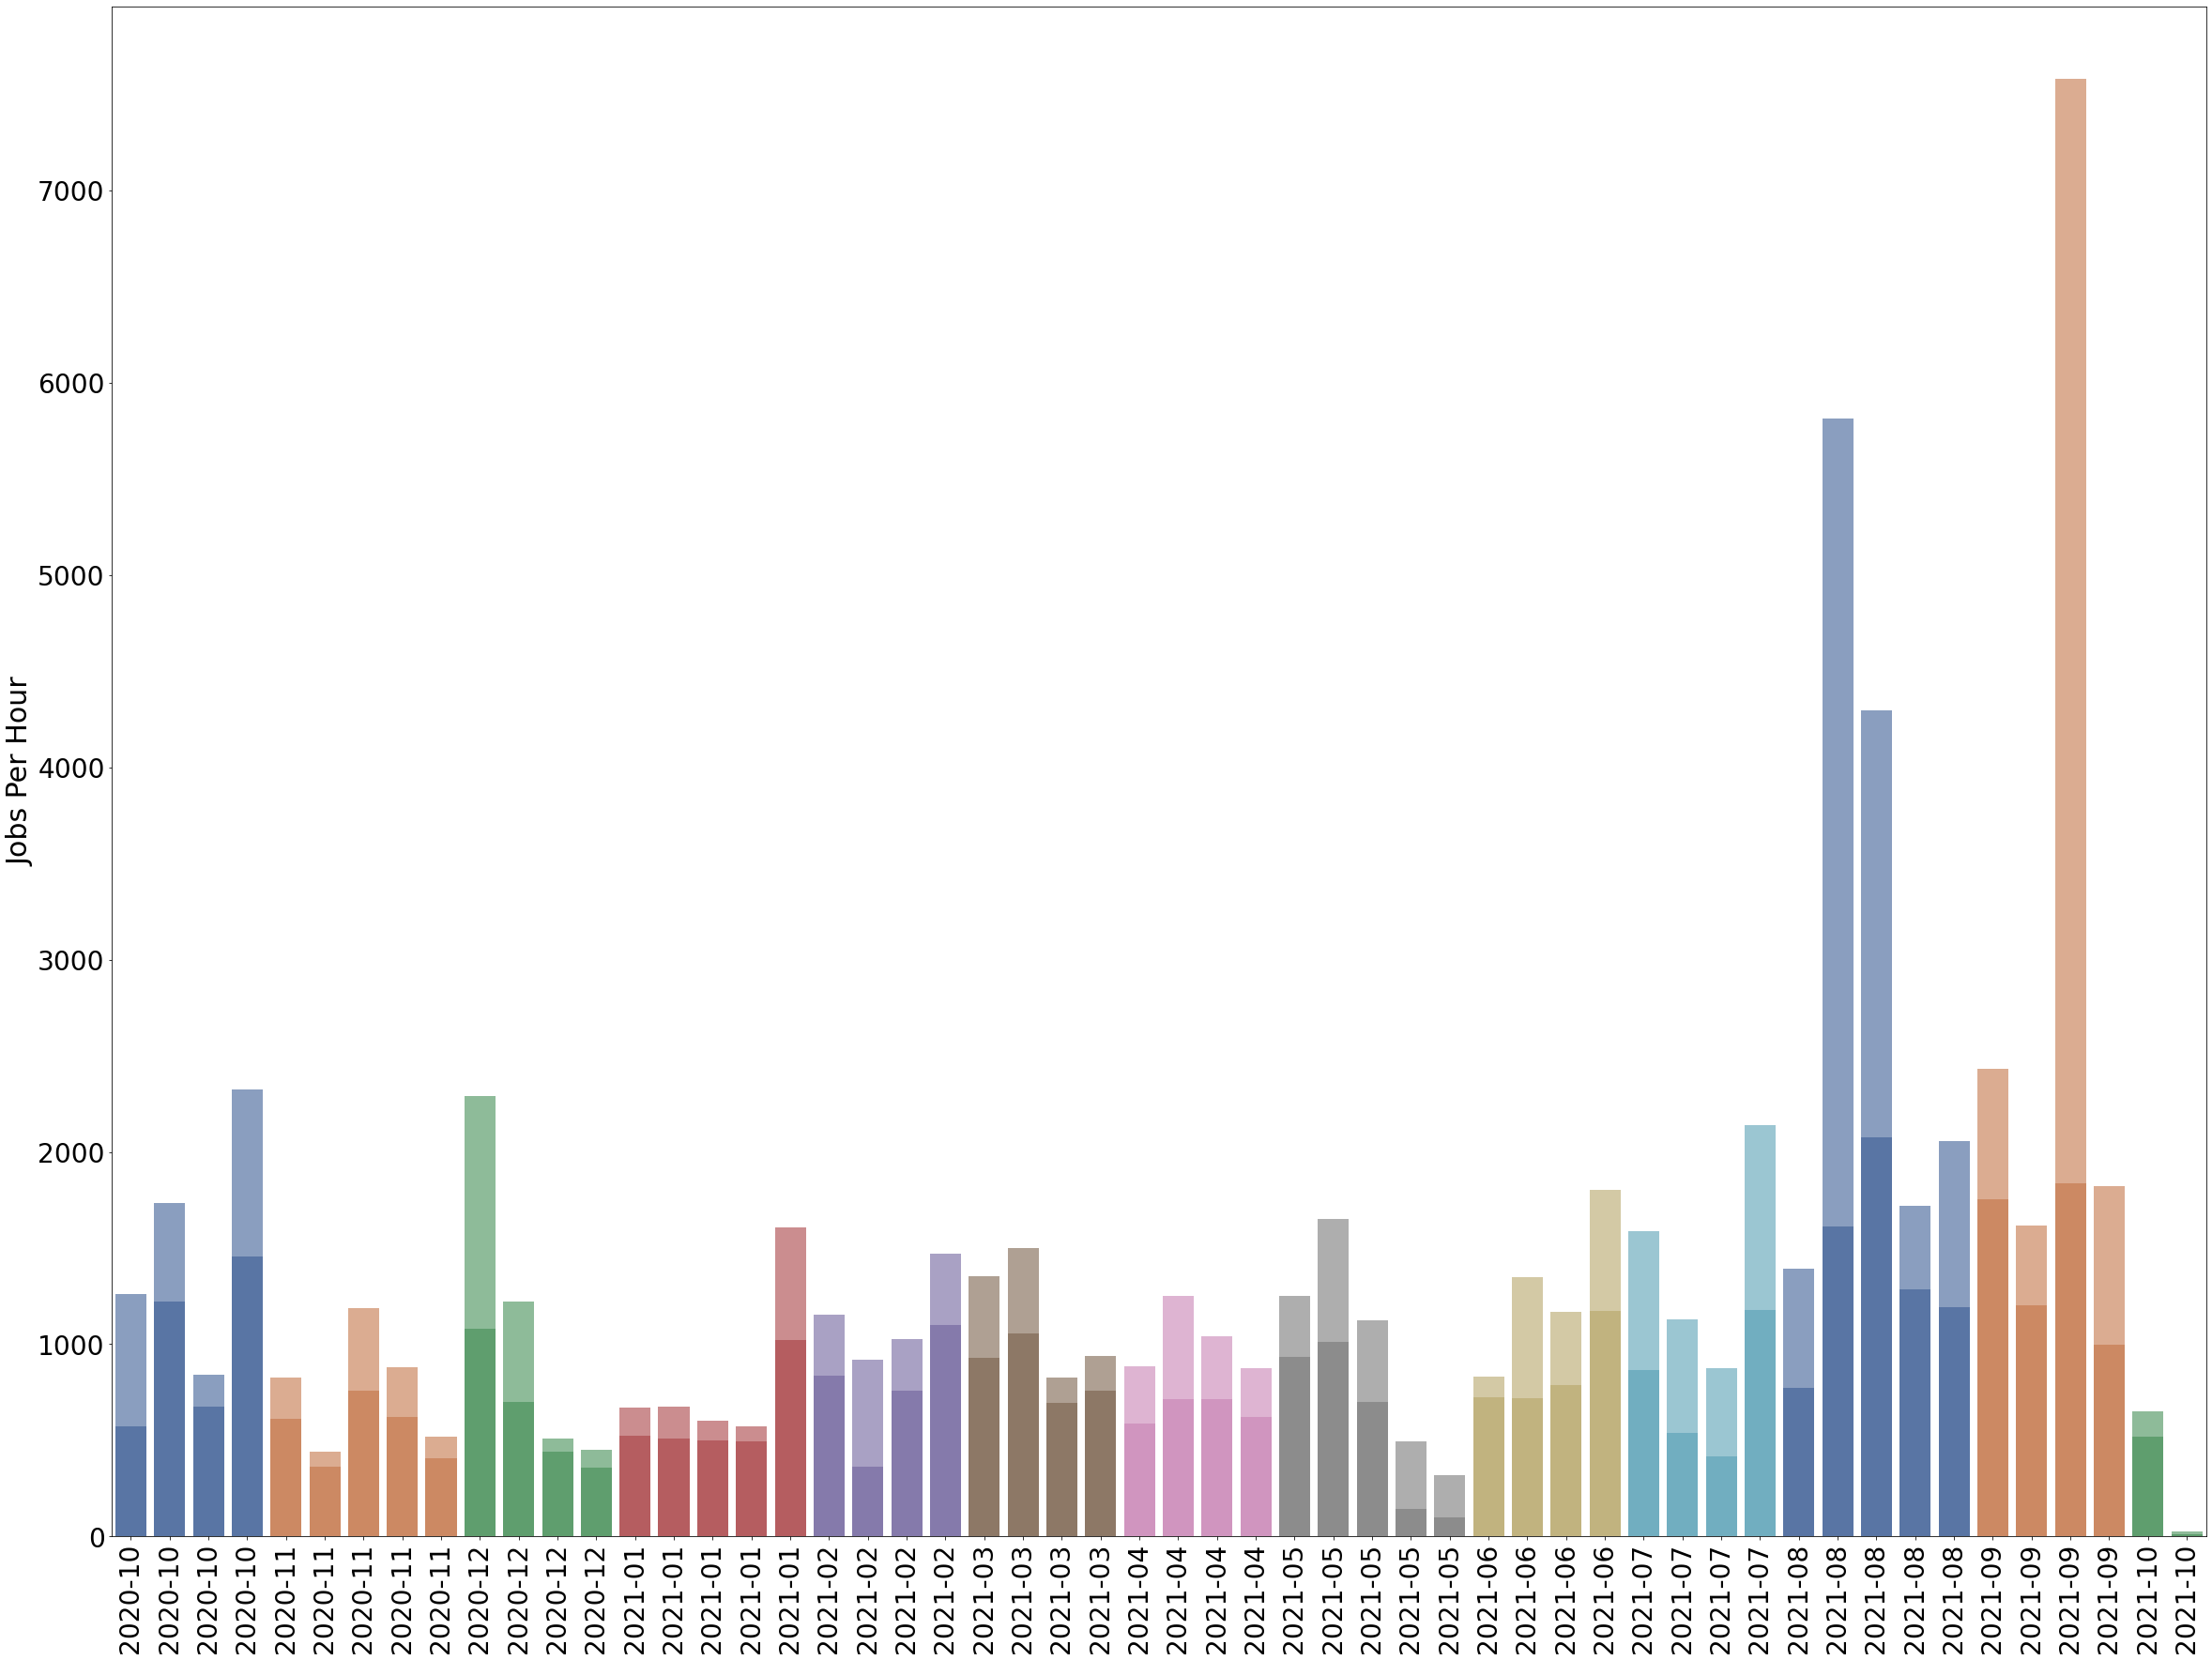

In [104]:
# Median jobs ended per hour each week
weekly_jobs_ended_by_hour_median = jobs.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_by_hour_median = weekly_jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each week
weekly_jobs_ended_by_hour_mean = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour_mean = weekly_jobs_ended_by_hour_mean.reset_index()

# Format date ticks for x axis
date_labels = weekly_jobs_ended_by_hour_median['END'].dt.strftime('%Y-%m')

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(40, 30))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_by_hour_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour_mean, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 90)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

ax.get_legend().set_visible(False);

In [8]:
third_week_september = jobs[(jobs['END'].dt.date >= pd.to_datetime('2021-09-19')) 
                            & (jobs['END'].dt.date < pd.to_datetime('2021-09-26'))]

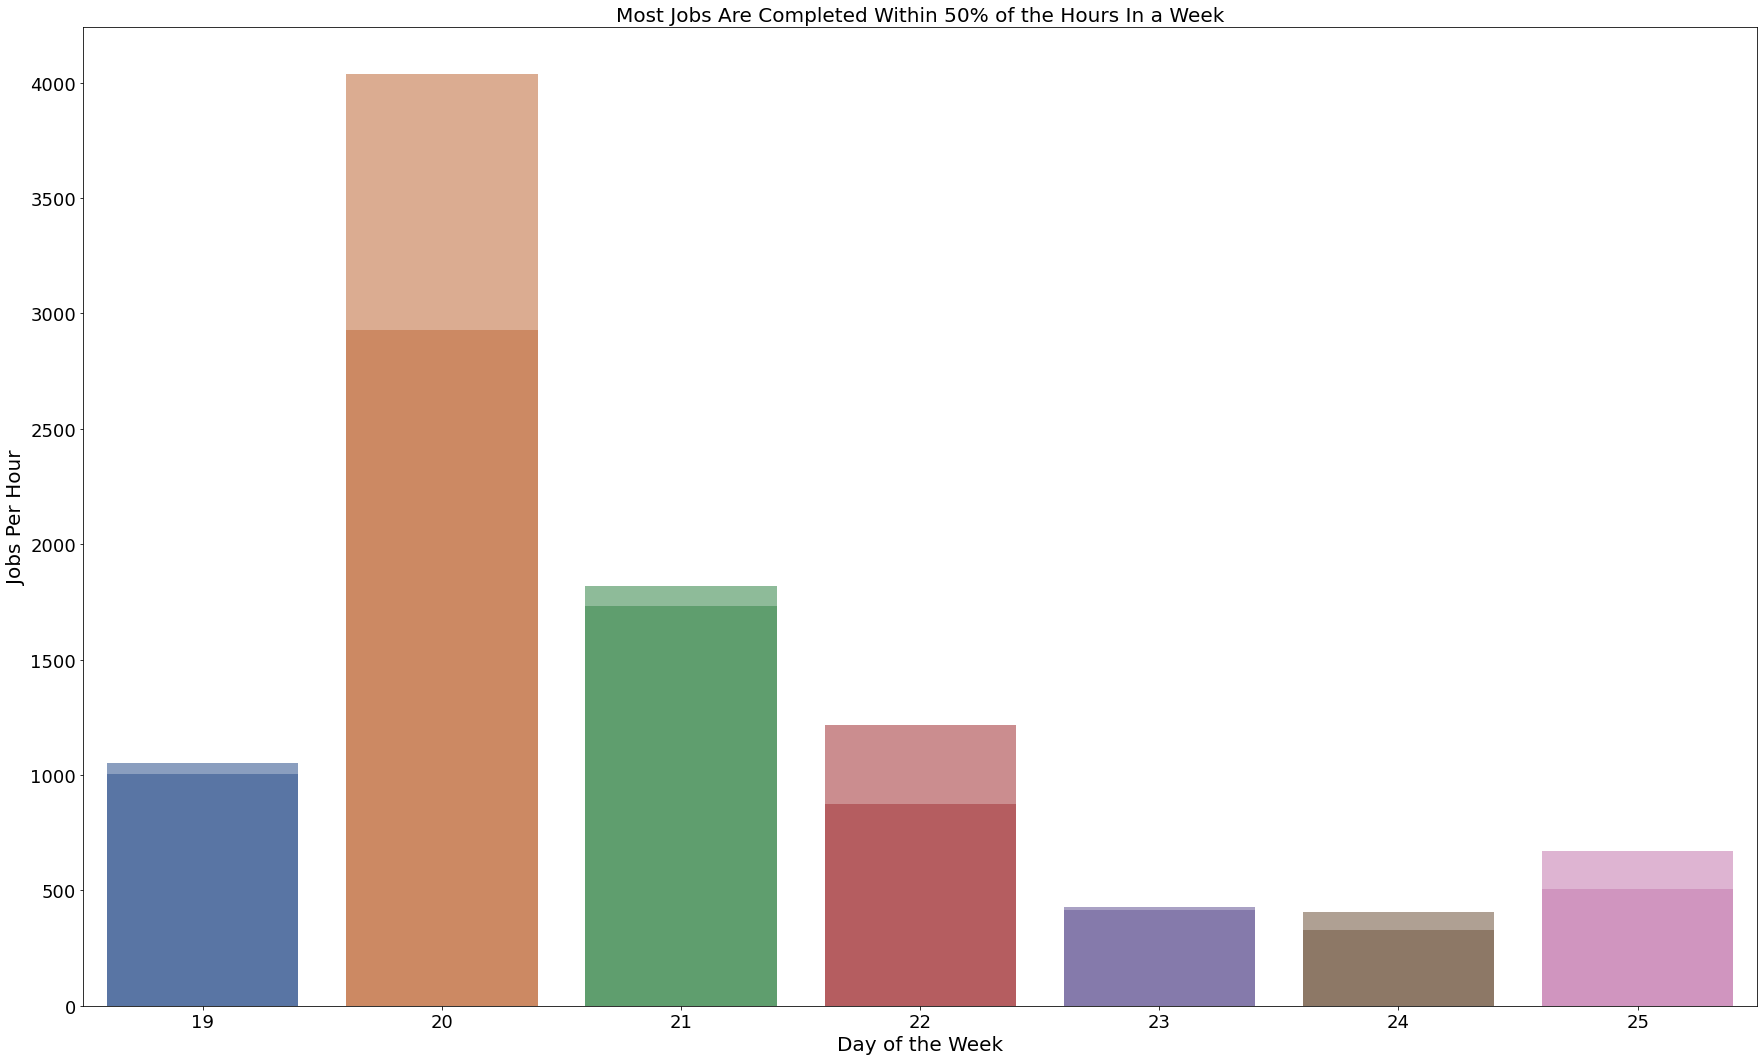

In [63]:
# Median jobs ended per hour each day in the third week of September
third_week_september_jobs_ended_by_hour_median = third_week_september.groupby(jobs['END'].dt.day).median()
third_week_september_jobs_ended_by_hour_median = third_week_september_jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each day in the third week of September
third_week_september_jobs_ended_by_hour_mean = third_week_september.groupby(jobs['END'].dt.day).count().drop({'END'}, axis='columns')/24
third_week_september_jobs_ended_by_hour_mean = third_week_september_jobs_ended_by_hour_mean.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = third_week_september_jobs_ended_by_hour_median, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = third_week_september_jobs_ended_by_hour_mean, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
plt.xlabel('Day of the Week', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

plt.title(mean_median_title, fontsize = fontsize);

In [102]:
third_week_september.groupby(jobs['END'].dt.hour).count()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,REQMEMTOT,REQMEMPERCORE,USEDMEMTOT,GROUP1H
END,,,,,,,,,,,,,,,,,
0,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024,6024
1,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773,7773
2,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244,11244
3,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706
4,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703
5,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981
6,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760,8760
7,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007
8,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613,8613


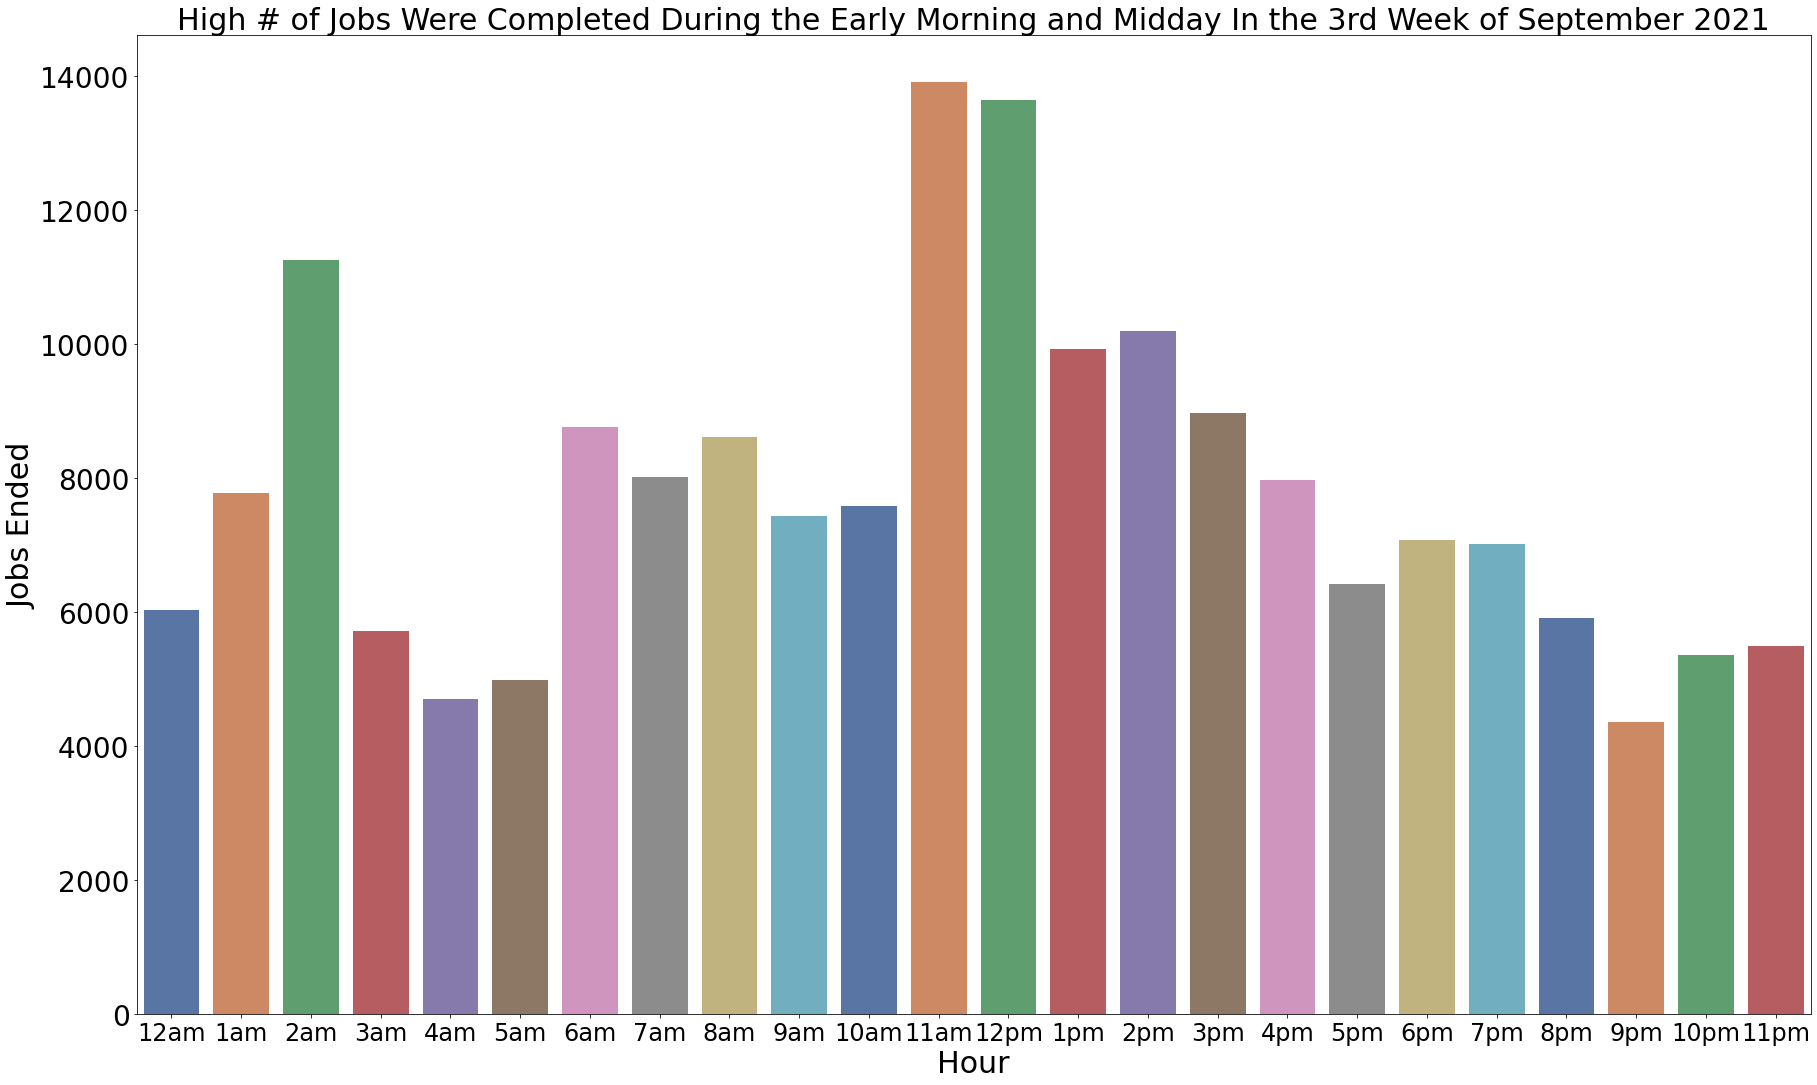

In [103]:
# Average(mean) jobs ended per hour for the third week in September
third_week_september_jobs_ended_by_hour_mean = third_week_september.groupby(jobs['END'].dt.hour).count().drop({'END'}, axis='columns')
third_week_september_jobs_ended_by_hour_mean = third_week_september_jobs_ended_by_hour_mean.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = third_week_september_jobs_ended_by_hour_mean, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
date_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xlabel('Hour', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 6, rotation = 0)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Ended', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2);

plt.title("High # of Jobs Were Completed During the Early Morning and Midday In the 3rd Week of September 2021", fontsize = fontsize);

In [12]:
third_week_september.loc[third_week_september['STATE'].str.find('CANCELLED') == 0, 'STATE'] = 'CANCELLED'

C:\Users\hjrko\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


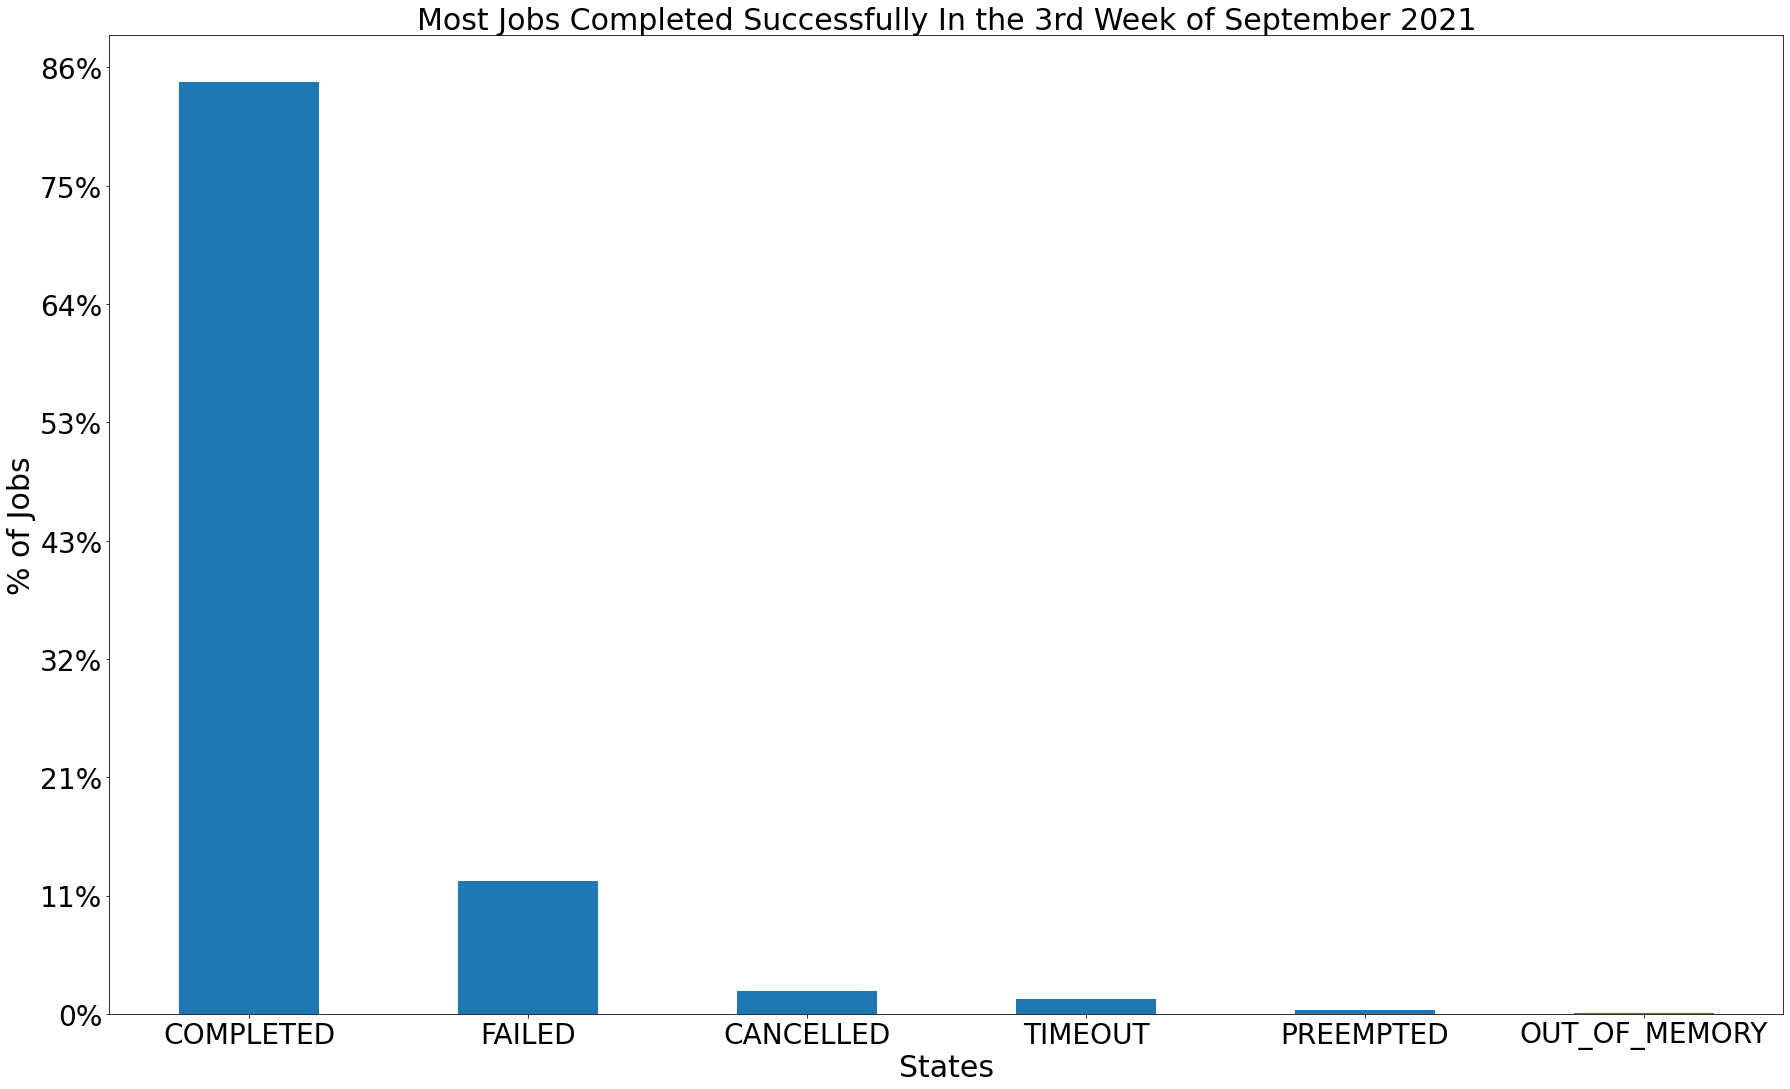

In [113]:
fig, ax = plt.subplots(figsize=(30, 18))
third_week_september['STATE'].value_counts().plot(kind='bar')

plt.xlabel('States', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)

plt.ylabel('% of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title('Most Jobs Completed Successfully In the 3rd Week of September 2021', fontsize = fontsize)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(187006));

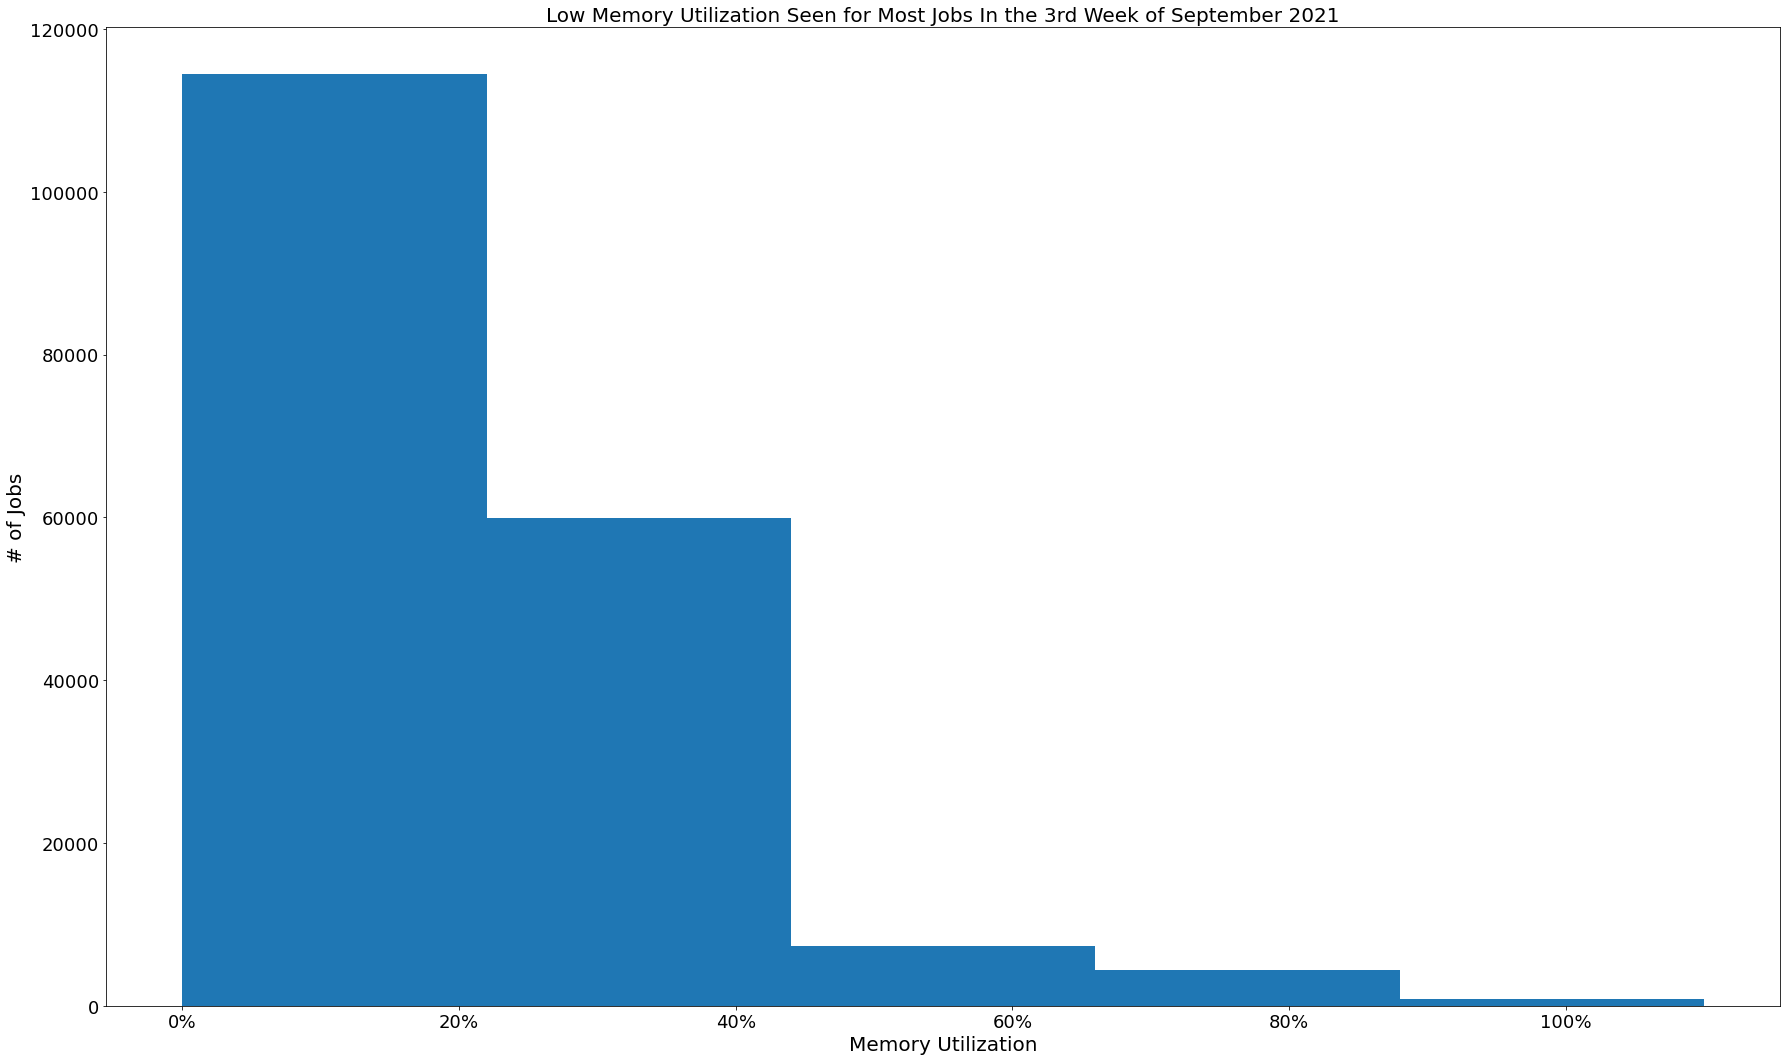

In [83]:
# Calculate memory utilization by dividing total memory used by total required memory
memory_utilization = third_week_september['USEDMEMTOT']/third_week_september['REQMEMTOT']

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
plt.hist(memory_utilization, bins=5)

# Set Axes labels and sizes
plt.xlabel('Memory Utilization', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('# of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Low Memory Utilization Seen for Most Jobs In the 3rd Week of September 2021", fontsize = fontsize);

<AxesSubplot:ylabel='Frequency'>

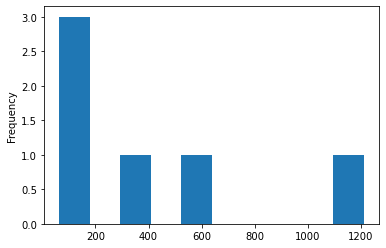

In [140]:
state_time_average = third_week_september.groupby('STATE')['JOBLENGTH'].mean(numeric_only=False)
state_time_average.astype('timedelta64[m]').plot.hist()

In [132]:
third_week_september['JOBLENGTH'].mean()

Timedelta('0 days 02:02:55.095034383')